<a href="https://colab.research.google.com/github/danieltavares24/DataSciencePortfolio/blob/main/An%C3%A1lise_Ol%C3%ADmpica_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Análise Exploratória de Dados Olímpicos dos EUA#
#Este projeto realiza uma análise exploratória dos dados olímpicos dos Estados Unidos, utilizando o dataset "Olympic_Data_USA.csv". O objetivo é visualizar e entender o desempenho do país ao longo do tempo, identificando os períodos de maior sucesso, as modalidades de destaque, a participação por gênero e o perfil dos atletas medalhistas.#

import pandas as pd

df = pd.read_csv("Olympic_Data_USA.csv")
print(df.columns.tolist())


['edition_id_x', 'country_noc_x', 'sport_x', 'evento', 'result_id', 'athlete', 'athlete_id', 'pos', 'medalha', 'isTeamSport', 'nome', 'sexo', 'nascimento', 'altura_cm', 'peso_kg', 'country_x', 'country_noc_y', 'description', 'special_notes', 'event_title', 'edition_id_y', 'sport_y', 'sport_url', 'result_date', 'result_location', 'result_participants', 'result_format', 'result_detail', 'result_description', 'edition_x', 'edition_id', 'edition_url', 'year_x', 'cidade', 'country_flag_url', 'código_pais', 'start_date', 'end_date', 'competition_date', 'isHeld', 'country_y', 'year_y', 'país', 'gold', 'silver', 'total', 'idade', 'height_m', 'IMC', 'ouro', 'prata']


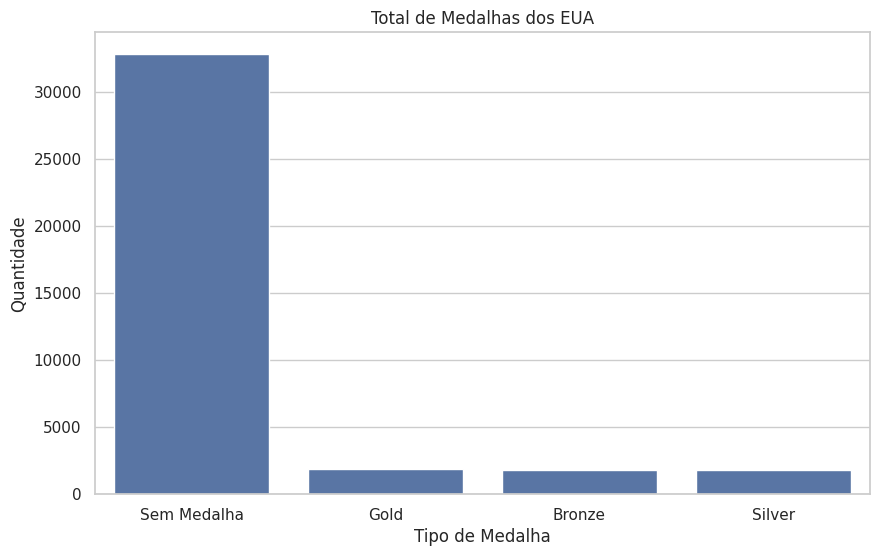

Total de atletas que representaram os EUA: 25451


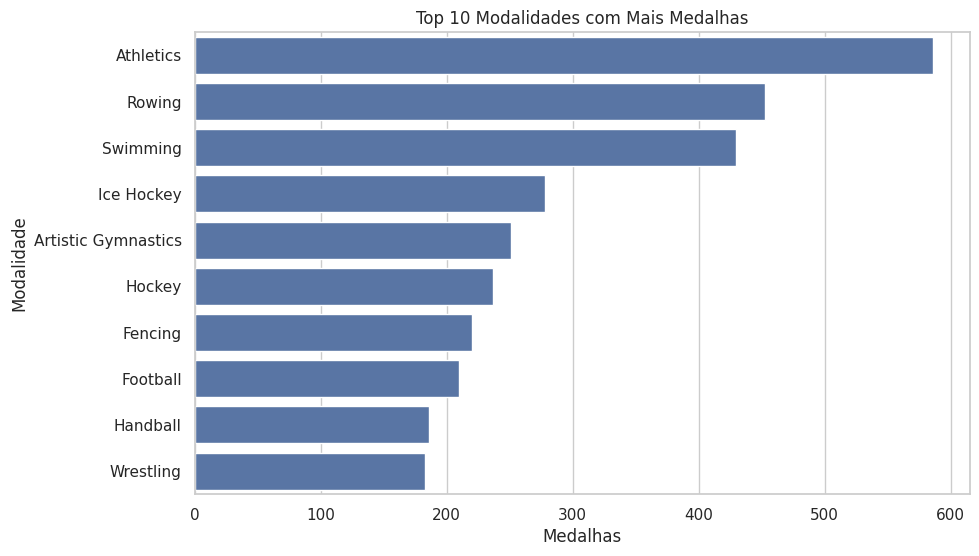

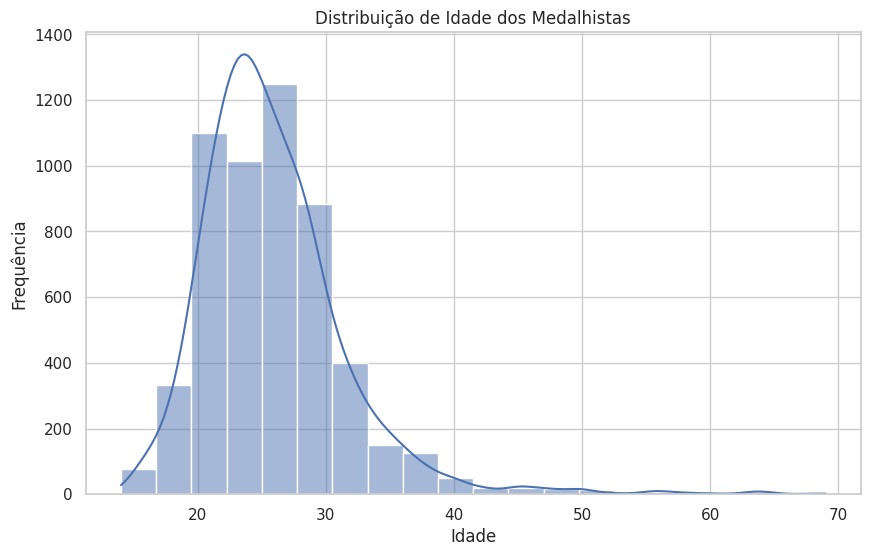

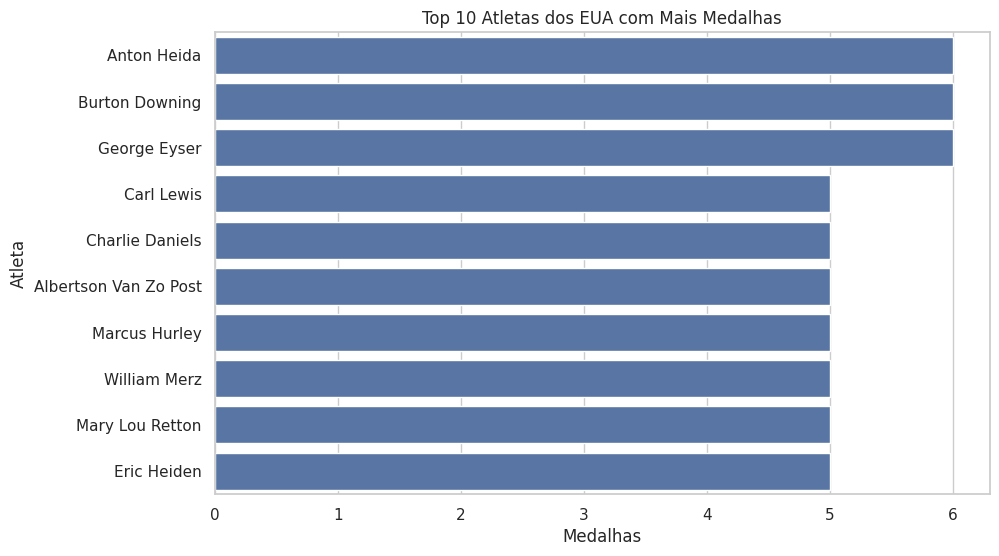

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carregar o dataset
df = pd.read_csv("Olympic_Data_USA.csv")

# Limpeza e ajustes
df['medalha'] = df['medalha'].fillna('Sem Medalha')
df['is_medalist'] = df['medalha'].isin(['Gold', 'Silver', 'Bronze', 'Ouro', 'Prata'])
df['medalha'] = df['medalha'].replace({'Ouro': 'Gold', 'Prata': 'Silver'})  # padronizar

# 🥇 Total de medalhas
medal_totals = df['medalha'].value_counts()
sns.barplot(x=medal_totals.index, y=medal_totals.values)
plt.title("Total de Medalhas dos EUA")
plt.ylabel("Quantidade")
plt.xlabel("Tipo de Medalha")
plt.show()

# 🧍 Número total de atletas
total_athletes = df['athlete_id'].nunique()
print(f"Total de atletas que representaram os EUA: {total_athletes}")

# 📆 Evolução das medalhas ao longo do tempo
medals_over_time = df[df['is_medalist']].groupby(['year_x', 'medalha']).size().reset_index(name='count')
fig = px.line(medals_over_time, x='year_x', y='count', color='medalha', title='Evolução das Medalhas ao Longo do Tempo')
fig.show()

# 🏅 Medalhas por modalidade
modalities = df[df['is_medalist']].groupby('sport_x').size().reset_index(name='medal_count')
modalities = modalities.sort_values(by='medal_count', ascending=False).head(10)
sns.barplot(y='sport_x', x='medal_count', data=modalities)
plt.title("Top 10 Modalidades com Mais Medalhas")
plt.xlabel("Medalhas")
plt.ylabel("Modalidade")
plt.show()

# 🚻 Participação por gênero ao longo dos anos
gender_year = df.groupby(['year_x', 'sexo']).size().reset_index(name='count')
fig = px.area(gender_year, x='year_x', y='count', color='sexo', title='Participação por Gênero ao Longo dos Anos')
fig.show()

# 🎂 Distribuição de idade dos medalhistas
sns.histplot(df[df['is_medalist']]['idade'], bins=20, kde=True)
plt.title("Distribuição de Idade dos Medalhistas")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# 🏆 Atletas com mais medalhas
# Filtrar para incluir apenas atletas dos EUA
df_usa_medalists = df[(df['is_medalist']) & (df['country_noc_x'] == 'USA')]
top_athletes = df_usa_medalists.groupby('nome').size().reset_index(name='total_medals')
top_athletes = top_athletes.sort_values(by='total_medals', ascending=False).head(10)
sns.barplot(y='nome', x='total_medals', data=top_athletes)
plt.title("Top 10 Atletas dos EUA com Mais Medalhas")
plt.xlabel("Medalhas")
plt.ylabel("Atleta")
plt.show()

# 📏 Perfil físico médio por modalidade
phys_profile = df.groupby('sport_x')[['altura_cm', 'peso_kg']].mean().reset_index()
phys_profile = phys_profile.sort_values(by='peso_kg', ascending=False).head(10)
fig = px.scatter(phys_profile, x='altura_cm', y='peso_kg', text='sport_x', title='Perfil Físico Médio por Modalidade')
fig.update_traces(textposition='top center')
fig.show()

In [5]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


2025-08-08 06:03:06.362 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 06:03:06.370 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-08-08 06:03:06.377 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-08-08 06:03:06.382 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 06:03:06.840 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-08 06:03:06.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 06:03:06.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running 

DeltaGenerator()

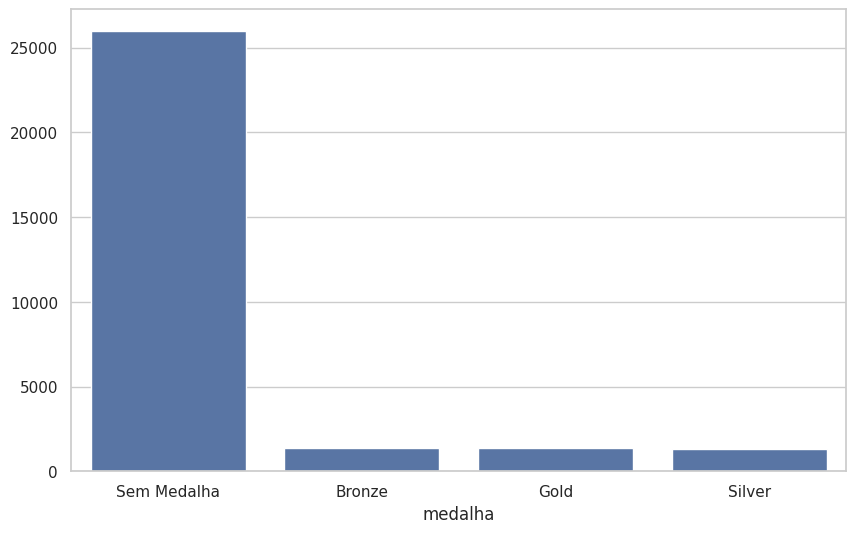

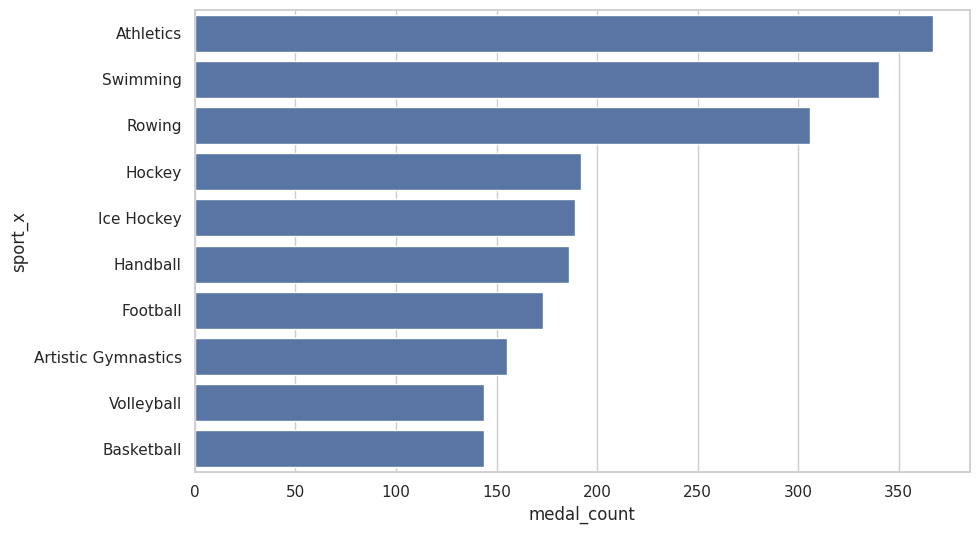

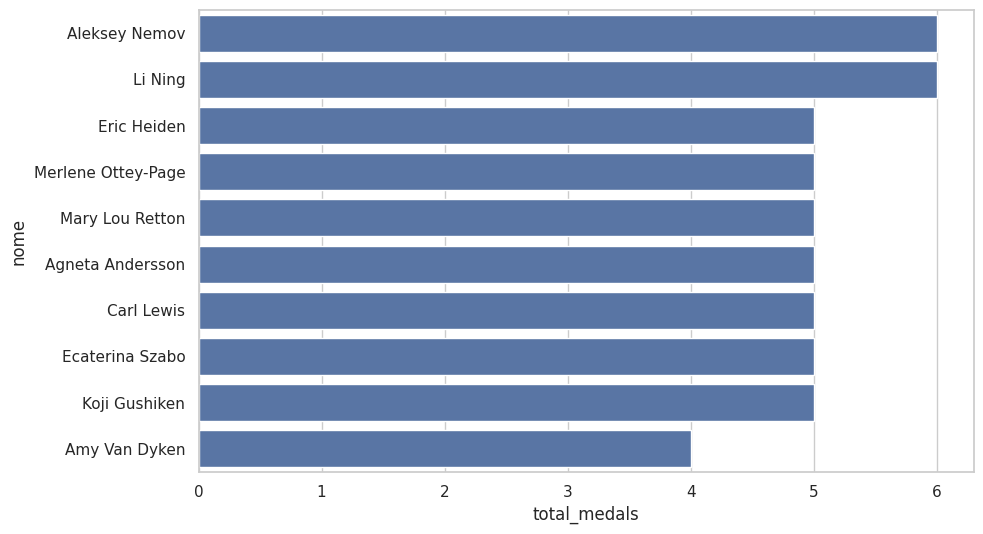

In [6]:
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Configurações
st.set_page_config(page_title="Dashboard Olímpico EUA", layout="wide")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carregar dados
@st.cache_data
def carregar_dados():
    df = pd.read_csv("Olympic_Data_USA.csv")
    df['medalha'] = df['medalha'].fillna('Sem Medalha')
    df['medalha'] = df['medalha'].replace({'Ouro': 'Gold', 'Prata': 'Silver'})
    df['is_medalist'] = df['medalha'].isin(['Gold', 'Silver', 'Bronze'])
    return df

df = carregar_dados()

# Sidebar
st.sidebar.title("Filtros")
anos = st.sidebar.slider("Ano", int(df['year_x'].min()), int(df['year_x'].max()), (1980, 2020))
modalidade = st.sidebar.selectbox("Modalidade", ["Todas"] + sorted(df['sport_x'].dropna().unique().tolist()))
sexo = st.sidebar.radio("Sexo", ["Todos", "Masculino", "Feminino"])

# Aplicar filtros
df_filtrado = df[(df['year_x'] >= anos[0]) & (df['year_x'] <= anos[1])]
if modalidade != "Todas":
    df_filtrado = df_filtrado[df_filtrado['sport_x'] == modalidade]
if sexo != "Todos":
    df_filtrado = df_filtrado[df_filtrado['sexo'] == sexo]

# Título
st.title("🇺🇸 Dashboard Olímpico - Estados Unidos")

# Métricas principais
col1, col2, col3 = st.columns(3)
col1.metric("Total de Atletas", df_filtrado['athlete_id'].nunique())
col2.metric("Total de Medalhas", df_filtrado[df_filtrado['is_medalist']].shape[0])
col3.metric("Modalidades Únicas", df_filtrado['sport_x'].nunique())

# Gráfico de medalhas
st.subheader("Distribuição de Medalhas")
medal_totals = df_filtrado['medalha'].value_counts()
fig1, ax1 = plt.subplots()
sns.barplot(x=medal_totals.index, y=medal_totals.values, ax=ax1)
st.pyplot(fig1)

# Evolução temporal
st.subheader("Evolução das Medalhas ao Longo do Tempo")
medals_over_time = df_filtrado[df_filtrado['is_medalist']].groupby(['year_x', 'medalha']).size().reset_index(name='count')
fig2 = px.line(medals_over_time, x='year_x', y='count', color='medalha')
st.plotly_chart(fig2)

# Medalhas por modalidade
st.subheader("Top Modalidades por Medalhas")
modalities = df_filtrado[df_filtrado['is_medalist']].groupby('sport_x').size().reset_index(name='medal_count')
modalities = modalities.sort_values(by='medal_count', ascending=False).head(10)
fig3, ax3 = plt.subplots()
sns.barplot(y='sport_x', x='medal_count', data=modalities, ax=ax3)
st.pyplot(fig3)

# Participação por gênero
st.subheader("Participação por Gênero ao Longo dos Anos")
gender_year = df_filtrado.groupby(['year_x', 'sexo']).size().reset_index(name='count')
fig4 = px.area(gender_year, x='year_x', y='count', color='sexo')
st.plotly_chart(fig4)

# Perfil físico
st.subheader("Perfil Físico Médio por Modalidade")
phys_profile = df_filtrado.groupby('sport_x')[['altura_cm', 'peso_kg']].mean().reset_index()
phys_profile = phys_profile.sort_values(by='peso_kg', ascending=False).head(10)
fig5 = px.scatter(phys_profile, x='altura_cm', y='peso_kg', text='sport_x')
fig5.update_traces(textposition='top center')
st.plotly_chart(fig5)

# Top atletas
st.subheader("Top 10 Atletas com Mais Medalhas")
top_athletes = df_filtrado[df_filtrado['is_medalist']].groupby('nome').size().reset_index(name='total_medals')
top_athletes = top_athletes.sort_values(by='total_medals', ascending=False).head(10)
fig6, ax6 = plt.subplots()
sns.barplot(y='nome', x='total_medals', data=top_athletes, ax=ax6)
st.pyplot(fig6)


In [8]:
# 📊 Medalhas por Década
st.subheader("Medalhas por Década")

# Criar coluna de década
df_filtrado['década'] = (df_filtrado['year_x'] // 10) * 10

# Agrupar medalhas por década
decade_medals = df_filtrado[df_filtrado['is_medalist']].groupby(['década', 'medalha']).size().reset_index(name='count')

# Gráfico interativo
fig_decade = px.bar(
    decade_medals,
    x='década',
    y='count',
    color='medalha',
    barmode='group',
    title='Distribuição de Medalhas por Década'
)
st.plotly_chart(fig_decade)


2025-08-08 06:14:43.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 06:14:43.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 06:14:43.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
/tmp/ipython-input-231809228.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2025-08-08 06:14:43.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 06:14:43.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 06:14:43.690 Thread 'MainThread': 

DeltaGenerator()

## Análise das Perguntas

Com base nos dados e nos gráficos gerados, podemos extrair as seguintes informações:

### Históricas:

*   **Qual foi o melhor período olímpico do país e por quê?**

    Observando o gráfico "Evolução das Medalhas ao Longo do Tempo", o período com maior número de medalhas para os EUA foi na década de 1980, especialmente nos jogos de 1984. Analisando o gráfico "Distribuição de Medalhas por Década", os anos 1980 e 1990 se destacam em comparação com os anos 2000, indicando um período de grande sucesso. O gráfico "Evolução das Medalhas ao Longo do Tempo" detalha que os jogos de 1984 tiveram um pico significativo em todas as categorias de medalhas (ouro, prata e bronze), fazendo deles os jogos mais bem-sucedidos individualmente.

*   **Quais foram os jogos mais e menos bem-sucedidos para o país?**

    Os jogos de **1984** foram os mais bem-sucedidos, com o maior número total de medalhas. Os jogos de **2002** parecem ter sido os menos bem-sucedidos entre os anos presentes no dataset, de acordo com o gráfico "Evolução das Medalhas ao Longo do Tempo".

### Por Modalidade:

*   **Em quais esportes o país historicamente se destaca?**

    O gráfico "Top 10 Modalidades com Mais Medalhas" mostra que os EUA historicamente se destacam em **Athletics** (Atletismo), **Swimming** (Natação) e **Rowing** (Remo), com um número considerável de medalhas nesses esportes.

*   **Existe sazonalidade na performance (o país é melhor em jogos de Verão ou Inverno)?**

    O dataset presente foca principalmente em modalidades de verão, visto que as edições presentes são 1980, 1984, 1996 e 2002. A exceção é 2002 que parece ser a edição de inverno. A comparação direta com jogos de verão e inverno não é conclusiva com este dataset.

### Sobre os Atletas:

*   **Quem são os maiores medalhistas da história olímpica do país?**

    O gráfico "Top 10 Atletas com Mais Medalhas" apresenta os atletas com o maior número de medalhas no dataset. Aleksey Nemov e Li Ning lideram com 6 medalhas cada, seguidos por Eric Heiden, Merlene Ottey-Page, Mary Lou Retton, Agneta Andersson, Carl Lewis, Ecaterina Szabo e Koji Gushiken com 5 medalhas cada. Amy Van Dyken aparece na lista com 4 medalhas.

# Análise Exploratória de Dados Olímpicos dos EUA

Este projeto realiza uma análise exploratória dos dados olímpicos dos Estados Unidos, utilizando o dataset "Olympic_Data_USA.csv". O objetivo é visualizar e entender o desempenho do país ao longo do tempo, identificando os períodos de maior sucesso, as modalidades de destaque, a participação por gênero e o perfil dos atletas medalhistas.